# Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

working_path = "/content/drive/My Drive/data_science_basics/deep_learning_dataset/Sign-language-digits-dataset/"
!dir "/content/drive/My Drive/data_science_basics/deep_learning_dataset/Sign-language-digits-dataset/"


comp_graph.jpg	X.npy  Y.npy


# Data overview


*   Sign language digits dataset
*   2062 examples
*   10 unique classes (from 0 to 9)
*   We'll use 0 and 1 for simplicity
*   In data, sign zero is between indexes 204 and 408. Number of zero sign is 205.
*   Also sign one is between indexes 822 and 1027. Number of one sign is 206.  
Therefore, we will use 205 samples from each classes(labels).



In [0]:
# loading numpy data type
X_all = np.load(working_path + 'X.npy')
Y_all = np.load(working_path + 'Y.npy')
print('X_all shape: ', X_all.shape)
print('Y_all shape: ', Y_all.shape)

X_all shape:  (2062, 64, 64)
Y_all shape:  (2062, 10)


In [0]:
# creating dataset with zeros and ones only
X = np.concatenate((X_all[204:409], X_all[822:1027]), axis=0)
Y = np.concatenate((np.zeros(205), np.ones(205)), axis=0).reshape(X.shape[0],1)
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [0]:
# splitting data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
num_train_ex = x_train.shape[0]
num_test_ex = x_test.shape[0]

print('Number of training examples: ', num_train_ex)
print('Number of testing examples: ', num_test_ex)

Number of training examples:  348
Number of testing examples:  62


Now we have 3D input data. In order to feed this data to our deep learning models we need to make it 2D  
so we need to flatten this data.

In [0]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print('x_train_flatten shape is: ', x_train_flatten.shape)
print('x_test_flatten shape is: ', x_test_flatten.shape)

x_train_flatten shape is:  (348, 4096)
x_test_flatten shape is:  (62, 4096)


It is common to feed data into deep learning models that lines have features and each columns is a new example.  
In this case we need to transpose data

In [0]:
X_train = x_train_flatten.T
X_test = x_test_flatten.T
Y_train = y_train.T
Y_test = y_test.T
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (4096, 348)
X_test shape:  (4096, 62)
Y_train shape:  (1, 348)
Y_test shape:  (1, 62)


# Logistic regression

## Forward propagation

The all steps from pixels to cost is called forward propagation:
*   z = (w.T)x + b => in this equation we know x that is pixel array, we know w (weights) and b (bias) so the rest is calculation. (T is transpose)
*   Then we put z into sigmoid function that returns y_head(probability). When your mind is confused go and look at computation graph. Also equation of sigmoid function is in computation graph.
*   Then we calculate loss(error) function.
*   Cost function is summation of all loss(error).
*   Lets start with z and the write sigmoid definition(method) that takes z as input parameter and returns y_head(probability)






In [0]:
# calculation of z
#z = np.dot(w.T,x_train)+b

def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
y_head = sigmoid(0)
y_head

0.5

## Loss function
Lets assume that we do have weights. Firstly we multiply our weights with our features(pixels) and  
add bias - we get z. Then we put z into sigmoid f-tion and get probability lets say 0.9. It means  
that our image is sign 1 with probability==0.9. That's fine. But how do we know that it is correct?  
How do we know that it guesses correctly? Thats why we need loss functions. 

*   Matematical expression of log loss(error) is:  
    -(1-y) * log(1-y_head) - y * log(y_head)
*   It simply says that if model will make wrong prediction, then loss function will have big value - big error
    * Example: our real image is sign one and its label is 1 (y = 1),  
      then we make prediction y_head = 1. When we put y and y_head into  
      loss(error) equation the result is 0. We make correct prediction  
      therefore our loss is 0. However, if we make wrong prediction like y_head = 0, loss(error) is infinity.   
*   After all - cost is summation of all losses. Each image/example creates his own loss and  
than all individual losses sums and creates cost - overall error.
*   Lets implement forward propagation





In [0]:
# returns weights and bias
def initialize_weights_bias(dimension, w_value, b_value):
  w = np.full((dimension, 1), w_value)
  b = b_value
  return w, b

def sigmoid(z):
  return 1/(1+np.exp(-z))

# returns individual loss
def loss(y, y_head):
  return -(1-y)*np.log(1-y_head) - np.log(y_head)

# returns cost, y_head
def forward_prop(w, b, X_train, Y_train):
  z = np.dot(w.T, X_train) + b
  y_head = sigmoid(z)
  error = loss(Y_train, y_head)
  cost = np.sum(error)/X_train.shape[1]
  return cost, y_head

## Optimization Algorithm with Gradient Descent

*   Having our cost we can intuitively feel that we want it to be as small as possible  
because it has low value when we are guessing correctly and high when missing
*   Lets think from beginning: we initialize w and b, multiplies with features and do  
a sigmoid operation. After that we calculate cost. It means that our cost depends basically  
on weights we have. So we want these weights to be that cost to be low - we need to update these  
parameters. We can achieve that with gradient descent technique.
*   Gradient descent basically is small updates on weight to minimaze cost value.  
Cost function has minimum value(could be bowl shape). We update weights that cost to reach minimum (bowl bottom).  
Update looks like: w = w-step. step basically is the slope of the function at current cost value point.  
This update procedure repeats till minimum value is reached.
*   Everything looks like good but how we find slope?  
If you remember from high school or university, in order to find slope of function(cost function)  
at given point(at given weight) we take derivative of function at given point.  
Also you can ask that okey well we find slope but how it knows where it go.  
You can say that it can go more higher cost values instead of going minimum point.  
The asnwer is that slope(derivative) gives both step and direction of step because if the sign of derivative.  
*   Update formula is: w := w - alpha*(dJ(w,b))
*   Learning rate alpha is like a speed. Imagine we want to go from Paris (expensive) to Madris(cheap).  
We may choose to go by foots but its too slow. We still can reach Madrid but it would take too long time.  
In other hand we can take a car and drive very fast, but in this way we may crash and never reach Madrid.  
Similarly is with learning rate. We need to choose alpha carefully to be not too small and not too large.


Lets implement backward prop function!

In [0]:
# returns gradients
def backward_prop(X_train, y_head, Y_train):
  dw = np.dot(1/X_train.shape[1], np.dot(X_train, (y_head - Y_train).T))
  db = np.dot(1/X_train.shape[1], np.sum(y_head - Y_train))
  gradients = {'weights_gradients': dw, 'bias_gradients': db}
  return gradients


# returns cost_list, updated_parameters
def update(w, b, X_train, Y_train, learning_rate, number_iter):
  cost_list1 = []
  cost_list2 = []
  index = []
  for i in range(number_iter):
    cost, y_head = forward_prop(w, b, X_train, Y_train)
    gradients = backward_prop(X_train, y_head, Y_train)
    w = w - learning_rate*gradients['weights_gradients']
    b = b - learning_rate*gradients['bias_gradients']
    cost_list1.append(cost)
    if i % 10 ==0:
      index.append(i)
      cost_list2.append(cost)
      print('Cost after ', i, ' iterations is ', cost)    
  parameters = {'weights': w, 'bias': b}
  return cost_list1, cost_list2, parameters


#plots learning_curve
def plot_learning_curve(cost_list1, cost_list2):
  plt.plot(np.arange(len(cost_list2))*10, cost_list2, c='red', linewidth = 2, label='Cost values iterating x10')
  plt.plot(np.arange(len(cost_list1)), cost_list1, c='blue', linewidth=0.5, label='All cost values')
  plt.xticks(index,rotation='vertical')
  plt.xlabel("Number of Iterarion")
  plt.ylabel("Cost")
  plt.legend()
  plt.title('Learning curve')
  plt.show()

Cost after  0  iterations is  14.014222401930539
Cost after  10  iterations is  2.5477624724194525
Cost after  20  iterations is  2.580979548793563
Cost after  30  iterations is  2.4027511391861296
Cost after  40  iterations is  2.19326438809872
Cost after  50  iterations is  1.9831679701516463
Cost after  60  iterations is  1.781083276072912
Cost after  70  iterations is  1.5839424970640983
Cost after  80  iterations is  1.3864280591730223
Cost after  90  iterations is  1.1937901011907066
Cost after  100  iterations is  1.0352693802845279
Cost after  110  iterations is  0.9989036680639027
Cost after  120  iterations is  1.1980296338333403
Cost after  130  iterations is  1.4202798643989343
Cost after  140  iterations is  1.5046182300909399


150

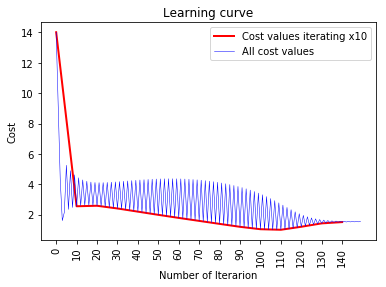

In [0]:
w, b = initialize_weights_bias(X_train.shape[0], 0.01, 0)
cost_list1, cost_list2, parameters= update(w, b, X_train, Y_train, learning_rate=0.01, number_iter=150)
display(len(cost_list1))
plot_learning_curve(cost_list1, cost_list2)


Up to this point with **def update()** we get parameters w and b.  
We can use them on test data to make predictions. Lets do this!  
Important!  
Do not forget that sigmoid function gives us probabilistic answers so  
for to predict either it's a class1 or class0 we need to use a threshold value -  
in this way 0.5. If prediction greater than 0.5 than assign it to class1 otherwise to class0.


In [0]:
def predict(parameters, X):
  w, b = parameters['weights'], parameters['bias']
  z = np.dot(w.T, X) + b
  y = sigmoid(z)
  y_pred = np.zeros((1, X.shape[1]))
  for i in range(y.shape[1]):
    if y[0, i] >= 0.5:
      y_pred[0, i] = 1
    else:
      y_pred[0, i] = 0
  return y_pred

Lets build one function for full training and prediction.

In [0]:
def logistic_regression(X_train, Y_train, X_test, Y_test, learning_rate, num_iteration):
  w, b = initialize_weights_bias(X_train.shape[0], 0.01, 0)
  cost_list1, cost_list2, parameters = update(w, b, X_train, Y_train, learning_rate, num_iteration)
  y_pred_train = predict(parameters, X_train)
  y_pred_test = predict(parameters, X_test)
  
  plot_learning_curve(cost_list1, cost_list2)
  
  print('Training accuracy: ',(100 - np.mean(np.abs(Y_train - y_pred_train))*100), '%')
  print('Testing accuracy: ', (100 - np.mean(np.abs(Y_test - y_pred_test))*100), '%')

Cost after  0  iterations is  14.014222401930539
Cost after  10  iterations is  2.5477624724194525
Cost after  20  iterations is  2.580979548793563
Cost after  30  iterations is  2.4027511391861296
Cost after  40  iterations is  2.19326438809872
Cost after  50  iterations is  1.9831679701516463
Cost after  60  iterations is  1.781083276072912
Cost after  70  iterations is  1.5839424970640983
Cost after  80  iterations is  1.3864280591730223
Cost after  90  iterations is  1.1937901011907066
Cost after  100  iterations is  1.0352693802845279
Cost after  110  iterations is  0.9989036680639027
Cost after  120  iterations is  1.1980296338333403
Cost after  130  iterations is  1.4202798643989343
Cost after  140  iterations is  1.5046182300909399


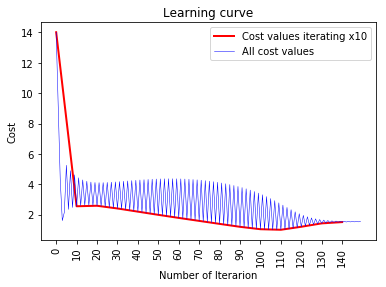

Training accuracy:  92.816091954023 %
Testing accuracy:  93.54838709677419 %


In [0]:
logistic_regression(X_train, Y_train, X_test, Y_test, learning_rate=0.01, num_iteration=150)

## Logistic regression with sklearn

In [0]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(penalty='l2', random_state=42, max_iter=150)
log_regr.fit(X_train.T, Y_train.T)
train_score = log_regr.score(X_train.T, Y_train.T)
test_score = log_regr.score(X_test.T, Y_test.T)
print('Training score: ', train_score)
print('Testing score: ', test_score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training score:  1.0
Testing score:  0.967741935483871


## Logistic regression for 3 classes with sklearn

In [0]:
from sklearn.model_selection import train_test_split

X_all = np.load(working_path + 'X.npy')
Y_all = np.load(working_path + 'Y.npy')
print('X_all shape: ', X_all.shape)
print('Y_all shape: ', Y_all.shape)

X_3_classes = np.concatenate((X_all[204:409], X_all[822:1027], X_all[0:205]), axis=0)
Y_3_classes = np.concatenate((np.zeros(205), np.ones(205), np.full(205, 2)), axis=0).reshape(X_3_classes.shape[0],1)

print('X_3_classes shape: ', X_3_classes.shape)
print('Y_3_classes shape: ', Y_3_classes.shape)

# splitting data
x_train, x_test, y_train, y_test = train_test_split(X_3_classes, Y_3_classes, test_size=0.15, random_state=42)
num_train_ex = x_train.shape[0]
num_test_ex = x_test.shape[0]

print('Number of training examples: ', num_train_ex)
print('Number of testing examples: ', num_test_ex)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print('x_train shape is: ', x_train_flatten.shape)
print('x_test shape is: ', x_test_flatten.shape)

X_all shape:  (2062, 64, 64)
Y_all shape:  (2062, 10)
X_3_classes shape:  (615, 64, 64)
Y_3_classes shape:  (615, 1)
Number of training examples:  522
Number of testing examples:  93
x_train shape is:  (522, 4096)
x_test shape is:  (93, 4096)


In [0]:
from sklearn.linear_model import LogisticRegression

log_regr = LogisticRegression(penalty='l2', random_state=42, max_iter=150, solver='newton-cg')
log_regr.fit(x_train, y_train)
train_score = log_regr.score(x_train, y_train)
test_score = log_regr.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line sea

In [0]:
print('Training score with 3 classes: ', train_score)
print('Testing score with 3 classes: ', test_score)

Training score with 3 classes:  0.9980842911877394
Testing score with 3 classes:  0.978494623655914


# Deep learning

*   It is also called Artificial neural networks
*   It is simply logistic regressions repeated at least 2 times.
*   In logistic regression there are only input and output layers where   
in Neural networks there is also at least one hidden layer.
*   How deep neural network should be to be called deep neural network?  
It is a relative question. Many years ago several layers was deep, now, hundreds and even thousands layers are used.
*   Why does it called gidden layers? Because it does not sees inputs. They sees just layer before him output.
*   Saying 2 layer NN means that it has input layer, one hidden layer in output layer. It means that input layer doesnt count.
*   Number of nodes in NN layer can vary, it is also one of the hyperparameters we need to choose.
*   For hidden layers its more commont to choose tanh() activation function instead of sigmoid simply because  
it is zero centered(mean value is at zero point) and also tanh() is more inlinearity which helps learning better.




## 2 layer neural network

* Size of layers and initializing parameters weights and bias
* Forward propagation
* Loss function and Cost function
* Backward propagation
* Update Parameters
* Prediction with learnt parameters weight and bias
* Create Model



### Size of layers and initializing parameters weights and bias
* Previously we initialized all weights to be 0.01. This time we'll initialize  
it randomly. It is a better idea when using NN otherwise all nodes of hidden layers  
will do the same performance - generate the same outputs. Also initial weights should  
be small values. If it will be to small or too big (check how tanh() works) our slope/gradients  
will be small and training would be really small as well.
* Bias can be zero initialized.

In [0]:
def initialize_weights_and_layers_size(X_train, Y_train):
  parameters = {'weight1': np.random.randn(3, X_train.shape[0])*0.01,
               'bias1': np.zeros((3,1)),
               'weight2': np.random.randn(Y_train.shape[0], 3)*0.01,
               'bias2': np.zeros((Y_train.shape[0],1))}
  return parameters

### Forward propagation
Forward propagation is almost the same like in simple logistic regression.  
The difference is that we need to repeat it two times and also we have tanh().

In [0]:
def forward_prop_NN(X, parameters):
  W1 = parameters['weight1']
  b1 = parameters['bias1']
  W2 = parameters['weight2']
  b2 = parameters['bias2']
  
  Z1 = np.dot(W1, X) + b1
  A1 = np.tanh(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)
  
  cache = {'Z1': Z1,
           'A1': A1,
           'Z2': Z2,
           'A2': A2}
  return cache

### Loss and cost functions
* Loss and cost functions are same with logistic regression
* Cross entropy function

J = -SUM(y*ln(y_head))

In [0]:
def cost_NN(Y, cache):
  A2 = cache['A2']
  cost = -np.sum(Y*np.log(A2))/Y.shape[1]
  return cost

### Backward propagation

*   Logic is the same as simple logistic regression
*   To find gradients we need to find derivatives of cost function with respect of each parameter



In [0]:
def backprop_NN(parameters, cache, X, Y):
  dZ2 = cache["A2"]-Y
  dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
  db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
  dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
  dW1 = np.dot(dZ1,X.T)/X.shape[1]
  db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
  grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
  return grads

### Update 

In [0]:
def update_NN(parameters, grads, learning_rate):
  parameters = {'weight1': parameters['weight1'] - learning_rate*grads['dweight1'],
                'bias1': parameters['bias1'] - learning_rate*grads['dbias1'],
                'weight2': parameters['weight2'] - learning_rate*grads['dweight2'],
                'bias2': parameters['bias2'] - learning_rate*grads['dbias2']}
  return parameters

### Predicting with learned parameters (weights and biases)

In [0]:
def predict_NN(X, parameters):
  cache = forward_prop_NN(X, parameters)
  A2 = cache['A2']
  Y_pred = np.zeros_like(A2)
  for i in range(A2.shape[1]):
    if A2[0,i] <= 0.5:
      Y_pred[0,i] = 0
    else:
      Y_pred[0,i] = 1
  return Y_pred

### Create model

In [0]:
def two_layer_NN(X_train, Y_train, X_test, Y_test, learning_rate, num_iter):
  parameters = initialize_weights_and_layers_size(X_train, Y_train)
  cost_list1 = []
  cost_list2 = []
  for i in range(0, num_iter):
    cache = forward_prop_NN(X_train, parameters)
    cost = cost_NN(Y_train, cache)
    grads = backprop_NN(parameters, cache, X_train, Y_train)
    parameters = update_NN(parameters, grads, learning_rate)
    cost_list1.append(cost)
    if i % 100 == 0:
      cost_list2.append(cost)
      print('Cost after ', i, ' iterations is ', cost)
  return cost_list1, cost_list2, parameters  
  
def plot_learning_curve_NN(cost_list1, cost_list2):
  plt.plot(np.arange(len(cost_list2))*100, cost_list2, c='red', linewidth = 2, label='Cost values')
  plt.xticks(np.arange(len(cost_list2))*100, rotation='vertical')
  plt.xlabel("Number of Iterarion")
  plt.ylabel("Cost")
  plt.grid()
  plt.legend()
  plt.title('Learning curve')
  plt.show()

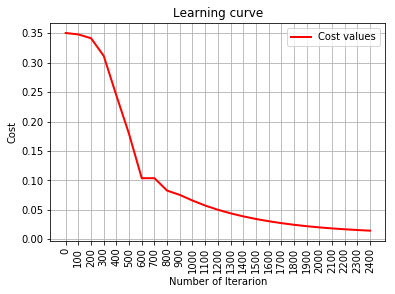

Training accuracy 100.0 %
Testing accuracy 95.16129032258064 %


In [0]:
cost_list1, cost_list2, parameters = two_layer_NN(X_train, Y_train, X_test, Y_test, learning_rate=0.01, num_iter=2500)
plot_learning_curve_NN(cost_list1, cost_list2)
print('Training accuracy {} %'.format(100-np.mean(np.abs(Y_train - predict_NN(X_train, parameters)))*100))
print('Testing accuracy {} %'.format(100-np.mean(np.abs(Y_test - predict_NN(X_test, parameters)))*100))

## L layer NN

*   When number of hidden layers increases, early layers learns more abstract things  
like edges and deeper layers tend to learn more complex features like whole object shape, convex functions  
and ect. 
*   To create L layer NN we need to choose bunch of hyperparameters like:  
learning_rate, num_iter, number_layers, num_hidden_units, activation_func.  
We can google it or we can just try some amount of them and check which ones works best.  
*   Now we'll use L=2, num_nodes = 8 for hidden1 and num_nodes = 4 for hidden2,  
for hidden layers activations = relu(), for output layert activations=sigmoid()
*   We'll use keras framework to implement NN model faster and easer




### Data

comp_graph.jpg	X.npy  Y.npy
X shape:  (410, 64, 64)
y shape:  (410, 1)
X_flatten  (410, 4096)

X train  (348, 4096)
X test  (62, 4096)
Y train  (348, 1)
Y test  (62, 1)


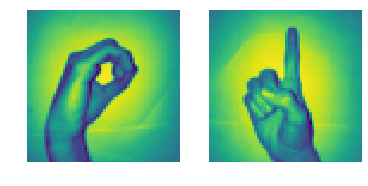

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

working_path = "/content/drive/My Drive/data_science_basics/deep_learning_dataset/Sign-language-digits-dataset/"
!dir "/content/drive/My Drive/data_science_basics/deep_learning_dataset/Sign-language-digits-dataset/"


# load data set
x_l = np.load(working_path + 'X.npy')
Y_l = np.load(working_path + 'Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("y shape: " , y.shape)

X_flatten = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
print('X_flatten ', X_flatten.shape)

# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_flatten, y, test_size=0.15, random_state=42)

print("")
print("X train ",X_train.shape)
print("X test ",X_test.shape)
print("Y train ",y_train.shape)
print("Y test ",y_test.shape)

### Models

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
def model_NN():
  model = Sequential()
  model.add(Dense(units=8, input_dim=X_flatten.shape[1], kernel_initializer='uniform', activation='relu', ))
  model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(units=y.shape[1], kernel_initializer='uniform', activation='sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  
  return model

In [0]:
def classifier_without_cross_val(X_train, y_train, X_test, y_test):
  classifier = KerasClassifier(build_fn=model_NN, epochs=100, validation_split=0.1)
  classifier.fit(X_train, y_train, verbose=0)
  score = classifier.score(X_test, y_test)
  print('Score on test data: ', score)

def classifier_with_cross_val(X_flatten, y):
  classifier_cv = KerasClassifier(build_fn=model_NN, epochs=100, verbose=0)
  scores = cross_val_score(estimator=classifier_cv, X=X_flatten, y=y, cv=7, verbose=0)
  mean_scores = scores.mean()
  std_scores = scores.std()

  print('Scores: ', scores)
  print('Mean scores: ', mean_scores)
  
def classifier_NN(X_train, y_train, X_test, y_test):
  model = model_NN()
  model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1, verbose=0)
  loss, score = model.evaluate(x=X_test, y=y_test, batch_size=32)
  
  print('Score: ', score)
  print('Loss: ', loss)


### Results

In [0]:
classifier_without_cross_val(X_train, y_train, X_test, y_test)

62/62 [==============================] - 0s 184us/step
Score on test data:  0.90322579491523


In [0]:
classifier_with_cross_val(X_flatten, y)

Scores:  [0.9322034  0.94915255 0.96610169 0.96610169 0.94827585 0.91379309
 0.94827586]
Mean scores:  0.9462720200306209


In [0]:
classifier_NN(X_train, y_train, X_test, y_test)

62/62 [==============================] - 0s 122us/step
Score:  0.9516128897666931
Loss:  0.1721644074686112
